# Census Income

by: Israel Diaz

email: idiazg@udd.cl


## Description

### 1. Source: [UCI -  Census Income Data Set](http://archive.ics.uci.edu/ml/datasets/Census+Income)

US Census Bureau.

### 2. Description of the Data: 

Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions:

`((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))`

* `age`: continuous.
* `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* `fnlwgt`: continuous.
* `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* `education-num`: continuous.
* `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* `sex`: Female, Male.
* `capital-gain`: continuous.
* `capital-loss`: continuous.
* `hours-per-week`: continuous.
* `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* `class`: >50K, <=50K




## Load Libraries and Data

In [1]:
## General Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
import warnings
warnings.simplefilter("ignore")

## Machine Learning Libs
## Machine Learning Libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer,make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn import set_config
set_config(display='diagram')

In [2]:
## setting column names
colnames = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
            'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']

## data urls
train_data = 'https://drive.google.com/uc?export=download&id=15jBe31Jx010YB9UwScEobI39U6Li9rML'
test_data = 'https://drive.google.com/uc?export=download&id=15gwyKg7ECdUyzstByfbp5w0kFXj9nEsE'

## loading data into dataframes
data_train = pd.read_csv(train_data, sep = ',', header=None, names=colnames)
data_test = pd.read_csv(test_data, sep = ',', header=None, names=colnames, skiprows=1)
data_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


## Data processing for EDA

For the purpose of the EDA I'll merge both datasets, but maintaining creating a new label that identifies each one with its origin.

In [3]:
data_train['train'] = 1
data_test['train'] = 0

In [4]:
display(data_train.head())
display(data_test.head())

print(f'Total Length: {len(data_train) + len(data_test)} observations')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,train
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,train
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.,0


Total Length: 48842 observations


In [5]:
## merge datasete
alldata = pd.concat([data_train, data_test], ignore_index=True)

In [6]:
print(f'Merged data Length: {len(alldata)} observations')

Merged data Length: 48842 observations


### Duplicated Values and Inconsistencies

In [7]:
##Show number of duplicated vals
alldata.duplicated().sum()

29

In [8]:
## drop duplicated vals
alldata.drop_duplicates(inplace=True)

## Show results
alldata.duplicated().sum()

0

In [9]:
## Inconsistencies

alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48813 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48813 non-null  int64 
 1   workclass       48813 non-null  object
 2   fnlwgt          48813 non-null  int64 
 3   education       48813 non-null  object
 4   education-num   48813 non-null  int64 
 5   marital-status  48813 non-null  object
 6   occupation      48813 non-null  object
 7   relationship    48813 non-null  object
 8   race            48813 non-null  object
 9   sex             48813 non-null  object
 10  capital-gain    48813 non-null  int64 
 11  capital-loss    48813 non-null  int64 
 12  hours-per-week  48813 non-null  int64 
 13  native-country  48813 non-null  object
 14  class           48813 non-null  object
 15  train           48813 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 6.3+ MB


All data types seems correct. Now I'll look for inconsistencies inside the data

In [10]:
## Inconsistencies in the categorical variables.

for col in alldata.select_dtypes(include='object').columns:
    print(f'Variable: {col} \n{alldata[col].unique()} \n\n')

Variable: workclass 
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 


Variable: education 
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 


Variable: marital-status 
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 


Variable: occupation 
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 


Variable: relationship 
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 


Variable: race 
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 


Va

**To-do:**

* Erase the white space of all classes.
* `workclass`, `occupation`, `native-country` change `?` to `Other`.
* `class` erase the `.` at the end of the classes.

In [11]:
replace = {'?':'Other',
           '<=50K.':'<=50K',
           '>50K.':'>50K'}

for col in alldata.select_dtypes(include='object').columns:
    alldata[col] = alldata[col].apply(lambda x: x.lstrip())
    alldata[col].replace(replace, inplace=True)


In [12]:
for col in alldata.select_dtypes(include='object').columns:
    print(f'Variable: {col} \n{alldata[col].unique()} \n\n')

Variable: workclass 
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Other' 'Self-emp-inc' 'Without-pay' 'Never-worked'] 


Variable: education 
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 


Variable: marital-status 
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 


Variable: occupation 
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Other'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 


Variable: relationship 
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 


Variable: race 
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 


Variable: sex 
['Male' 'Female'] 


Variable: native-

All Good

In [13]:
## FEATURE ENGINEERING

### agregated ages
bins = [0, 18, 30, 40, 50, 60, 70, 120]
labels = ['<18', '18-30', '31-40', '41-50', '51-60', '61-70', '71>=']
alldata['age_group'] = pd.cut(alldata['age'], bins, labels = labels, include_lowest = True)

## checking results
alldata.loc[:,['age', 'age_group']].sample(5)

,age,age_group
5358,33,31-40
12334,62,61-70
34043,66,61-70
33137,28,18-30
42533,41,41-50


## Exploratory Data Analysis

I'll plot histograms of all categorial variables and boxplots of numerical ones

In [14]:
#@title
def hist_bplot(df, col1, col2, bins='auto'):
  '''
    Display a histogram and a boxplot of two variables
    
    df = pandas dataframe
    col1 = variable 1 is going to be used to generate the histogram [string] type [numeric or categorical]
    col2 = variable 2 is going to be used to generate the boxplot. [string] type [numeric]
  '''

  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))

  #HISTOGRAM
  ax1.hist(df[col1], bins=bins, color='#29B6F6', histtype='bar', )

  #BOXPLOT
  ax2.boxplot(df[col2], notch ='True', vert = 0, patch_artist = True)
  ax2.axvline(np.median(df[col2]), color = 'red', linestyle='dashed', label = 'Median')
  ax2.axvline(np.percentile(df[col2], 25), color = 'grey', linestyle='dashed', label = 'Q1')
  ax2.axvline(np.percentile(df[col2], 75), color = 'grey', linestyle='dashed', label = 'Q3')

  #aesthetics
  fig.suptitle(f'{col1} Histogram and {col2} Box Plot', fontsize= 15)
  ax1.set_xlabel('{col1}')
  ax1.set_ylabel('Count')
  ax2.set_ylabel(col2)
  ax2.legend()

  ### Procedure from https://stackoverflow.com/questions/18194136/showing-specific-xtick-in-matplotlib
  # Get current tick locations and append 271 to this array
  x_ticks = np.append(ax2.get_xticks(), [np.percentile(df[col2], 25), np.percentile(df[col2], 75), np.median(df[col2])])

  # Set xtick locations to the values of the array `x_ticks`
  ax2.set_xticks(x_ticks)
  ###
  plt.savefig(f'img/{col1}_histogram_{col2}_boxplot.jpg')
  plt.show()
  ### subplots taken from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

### Age Histogram and Boxplot

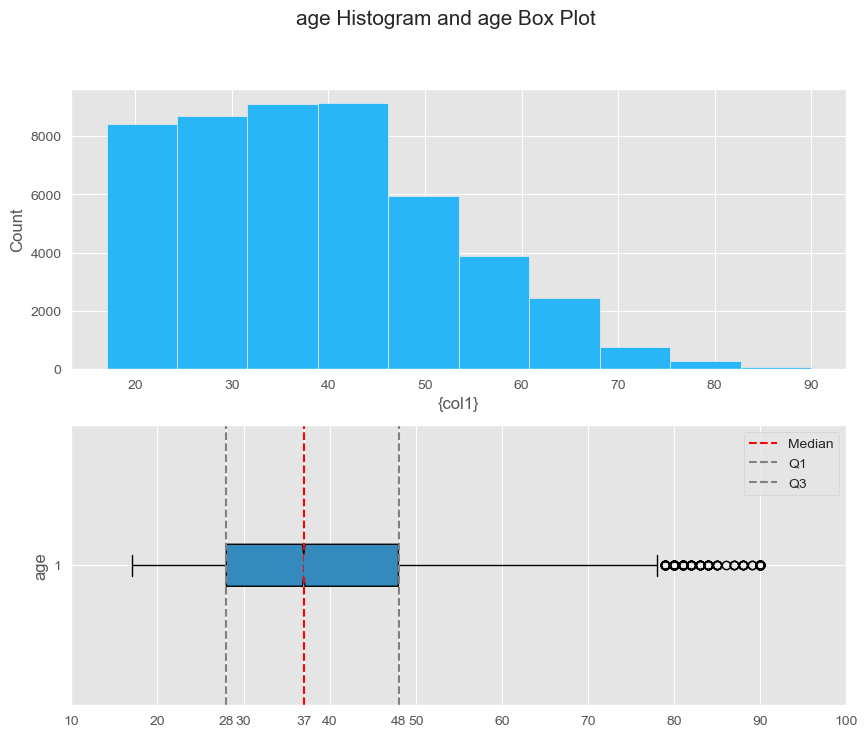

In [15]:
hist_bplot(alldata, col1='age', col2='age', bins=10)

* The age distribution is right skewed
* Median age = 37

### Class histogram by sex

In [16]:
#@title
def custom_histogram(data, main_classes, histo_classes, graph_height=3, share_axis = True):
    '''
      Display histogram grid

      data = pandas dataframe
      main_classes = it will be used to generate the grid, if you have 3 clases will generate 3 subplots [string] type [categorical]
      histo_classes = it will  be used generate every subplot [string] type [categorical]
    '''

    ax = sns.FacetGrid(data = data,
                       col= main_classes,
                       sharex= share_axis, sharey= share_axis,
                       height=graph_height , aspect=1
                       )
    ax.map_dataframe(sns.histplot,
                     x=histo_classes,
                     color = '#29B6F6',
                     ax = ax, )

    ax.fig.subplots_adjust(top=0.8)
    ax.fig.suptitle(f'{main_classes} histogram by {histo_classes}', fontsize= 15)
    ax.set_xticklabels(rotation=90)
    plt.savefig(f'img/{histo_classes}_per_{main_classes}.jpg')
    plt.show()

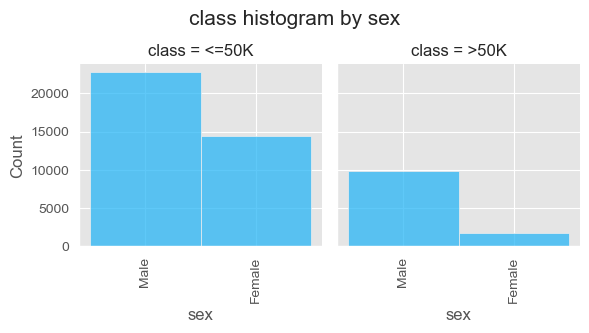

In [17]:
custom_histogram(data=alldata, main_classes='class', histo_classes='sex', graph_height=3)

* Both in `Male` and `Female` the amount of people in `<=50K` is greater than in `>50K`
* The proportion of `<=50K` in `Male` is twice and a half greater than `>50K` and in `Female` is 6 times.

### workclass by class countplot

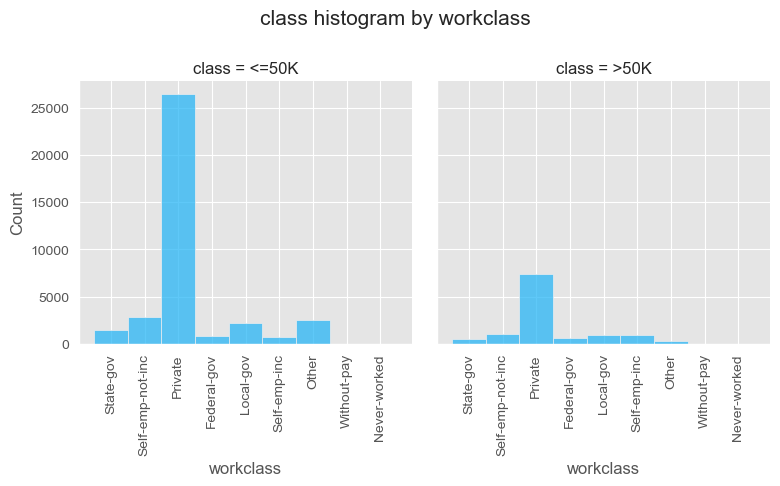

In [18]:
custom_histogram(data=alldata, main_classes='class', histo_classes='workclass', graph_height=4)

* class `State-gov` is highly predominant in `<=50K` class
* class `Private` is mostly predominant in `>50K` class

### Education by class

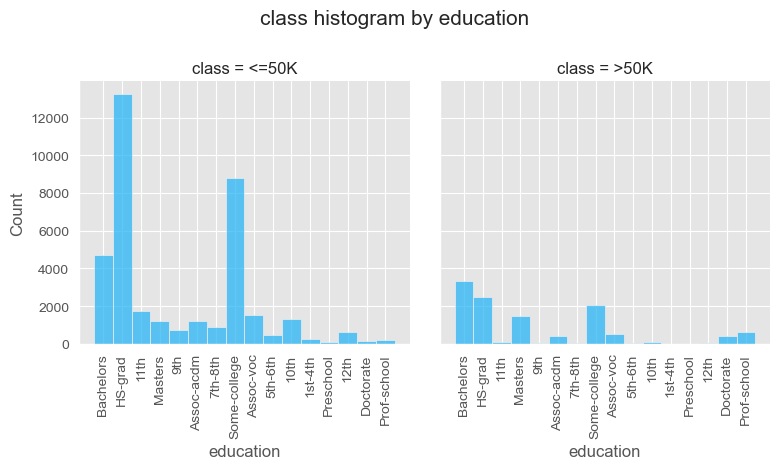

In [19]:
custom_histogram(data=alldata, main_classes='class', histo_classes='education', graph_height=4)

Very interesting insight here:
* The majority of the high skilled people of the data set are been paid under 50000.
* I see also very skilled people in `>50K` class

### Marital Status by class

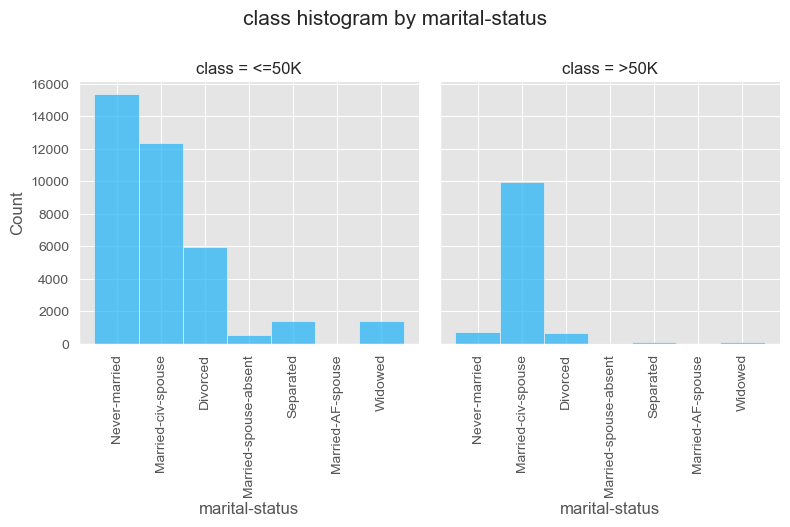

In [20]:
custom_histogram(data=alldata, main_classes='class', histo_classes='marital-status', graph_height=4)

### Occupation by class

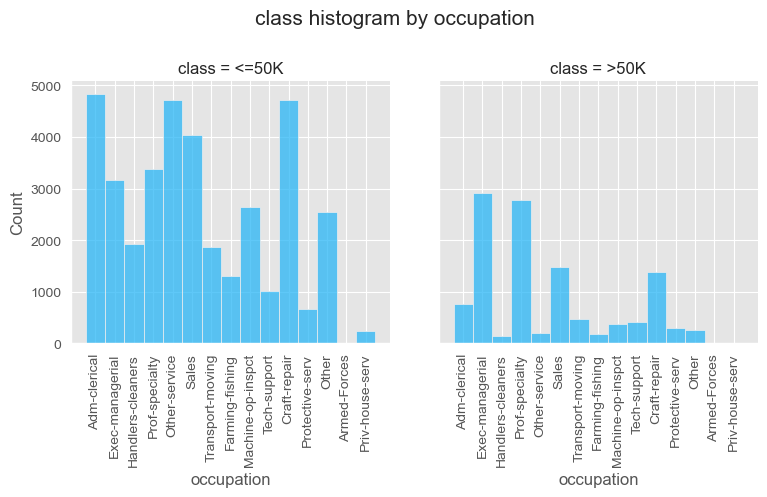

In [21]:
custom_histogram(data=alldata, main_classes='class', histo_classes='occupation', graph_height=4)

### Relationship by class

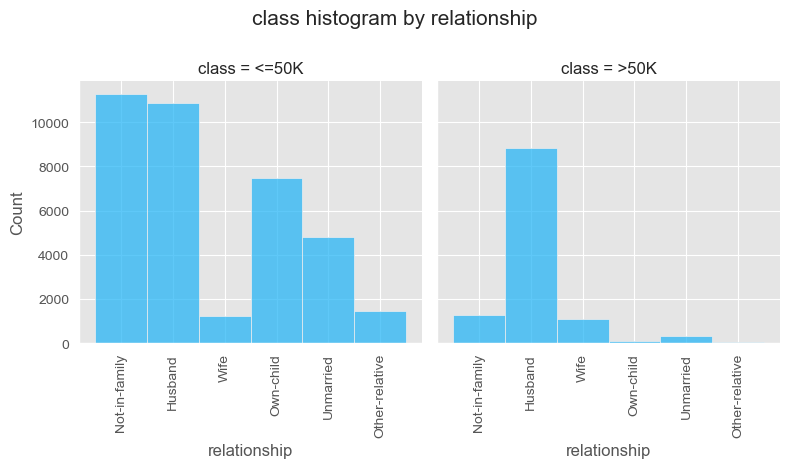

In [22]:
custom_histogram(data=alldata, main_classes='class', histo_classes='relationship', graph_height=4)

### race by class

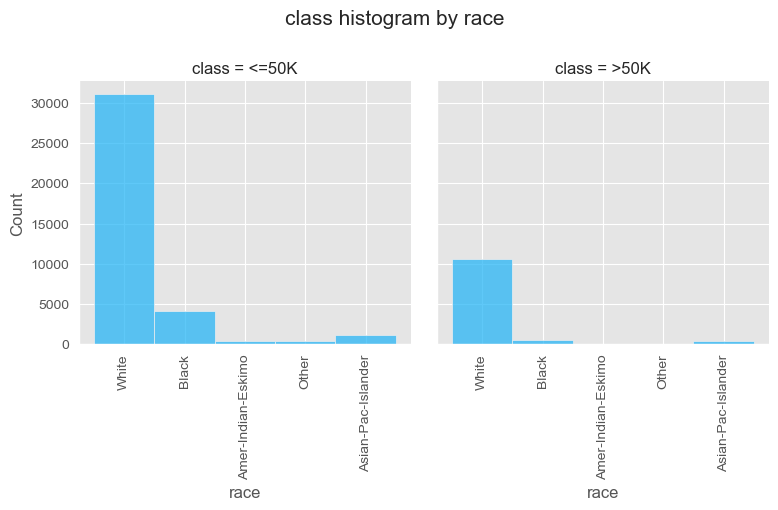

In [23]:
custom_histogram(data=alldata, main_classes='class', histo_classes='race', graph_height=4)

No important insight here, both graphs look similar but in different proportions.

### native-country by class

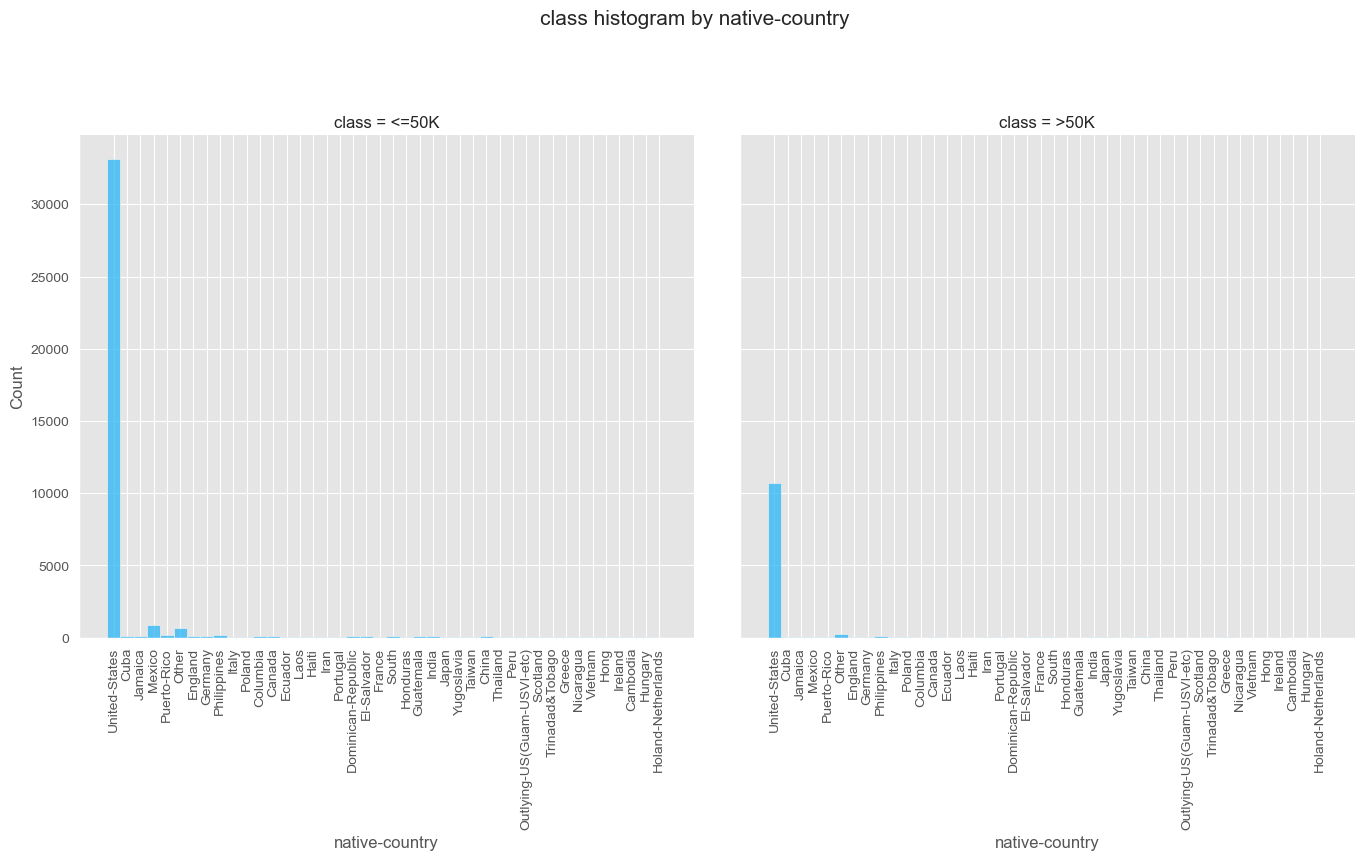

In [24]:
custom_histogram(data=alldata, main_classes='class', histo_classes='native-country', graph_height=7)

* As expected the great majority of the people is from the US

### fnlwgt Bxplot

In [25]:
#@title
def boxplot_grid(data, num_variable, cat_variable, notch = False, width = 0.2, dodge = True):
    '''
      Display multiple boxplots

      data = pandas dataframe
      num_variable = will be used to build every boxplot [string] type [numeric]
      cat_variable = will be used to split the boxpots in classes [string] type [categorical]
    '''

    fig, ax = plt.subplots(figsize=(10,10))
    sns.boxplot(y=num_variable, x= cat_variable,
                notch=notch, width=width,
                dodge=dodge,
                ax=ax,
                data=data)

    #aesthetics
    fig.suptitle(f'BoxPlot {num_variable} by {cat_variable}', fontsize= 15)
    fig.tight_layout(rect=[0, 0.1, 1, 0.93])
    ax.relim()
    #ax.autoscale_view()
    plt.savefig(f'img/{num_variable}_per_{cat_variable}.jpg')
    plt.show()

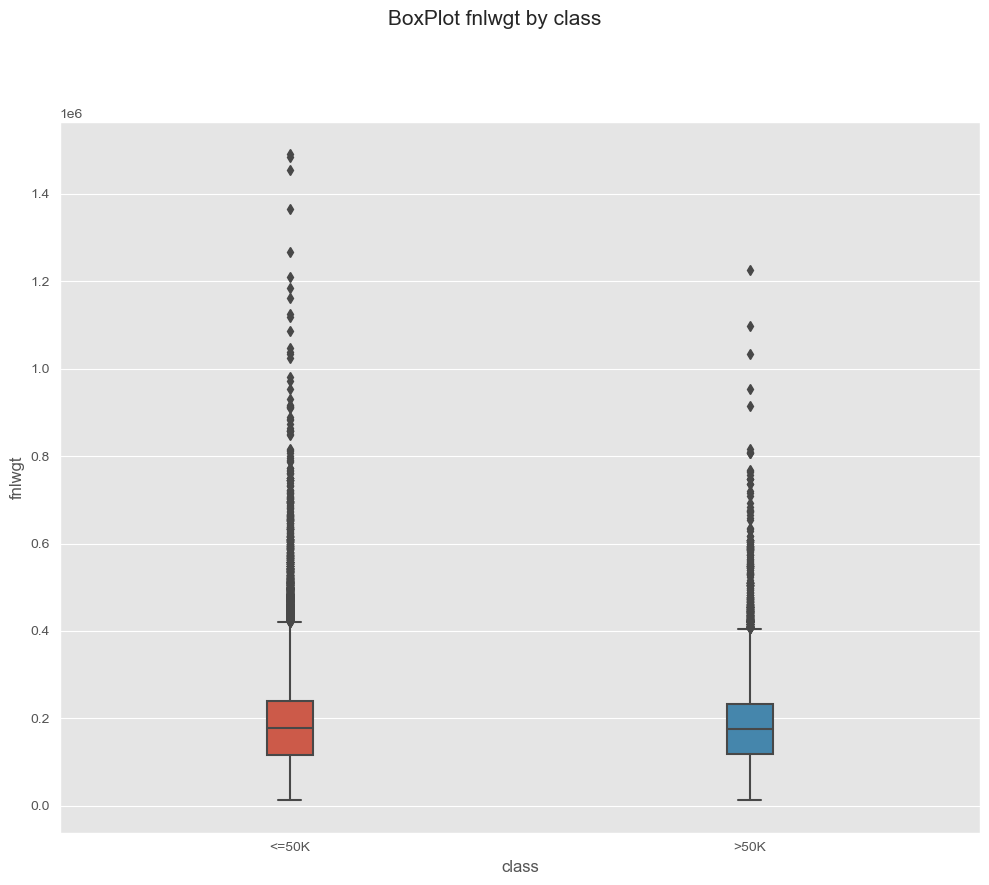

In [26]:
boxplot_grid(alldata, num_variable='fnlwgt', cat_variable='class', width=0.1)

* We have a lot of outliers. In further steps I'll identify them to see how they look like.
* In both classes sees similar values.

### education-num by class

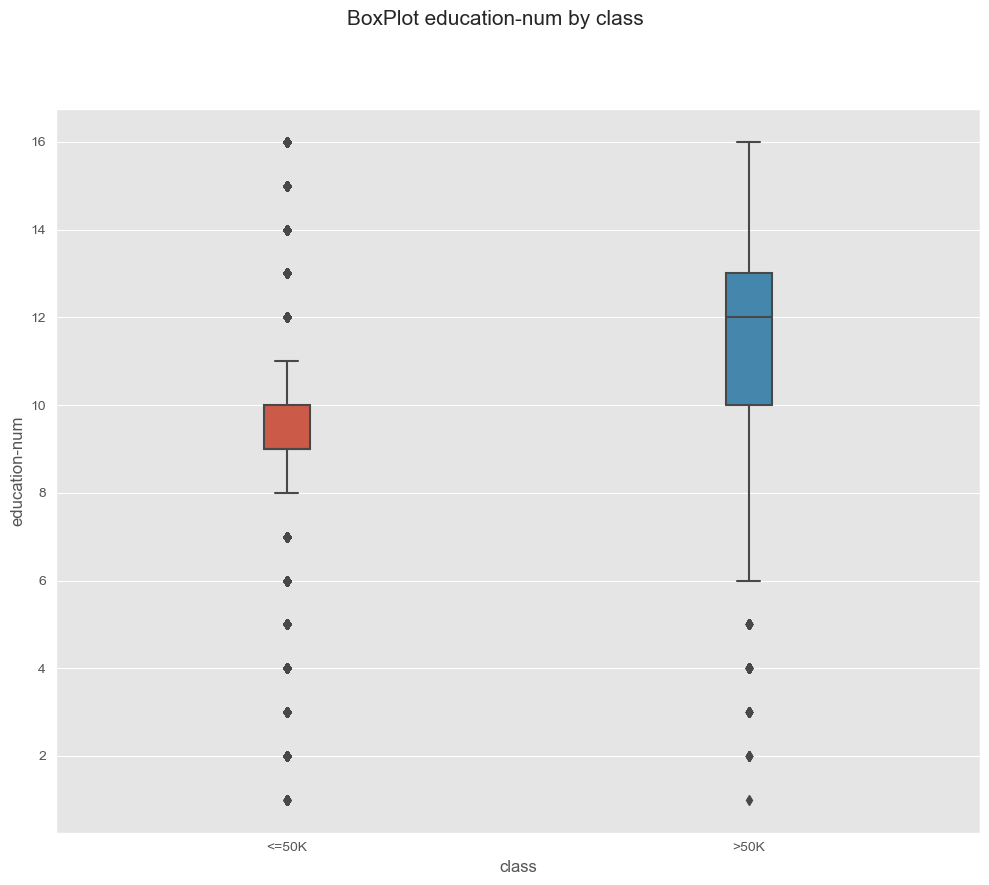

In [27]:
boxplot_grid(alldata, num_variable='education-num', cat_variable='class', width=0.1)

* Despite the graph shows the dots that could be interpreted as outliers, they're not outliers.

### capital-gain by class

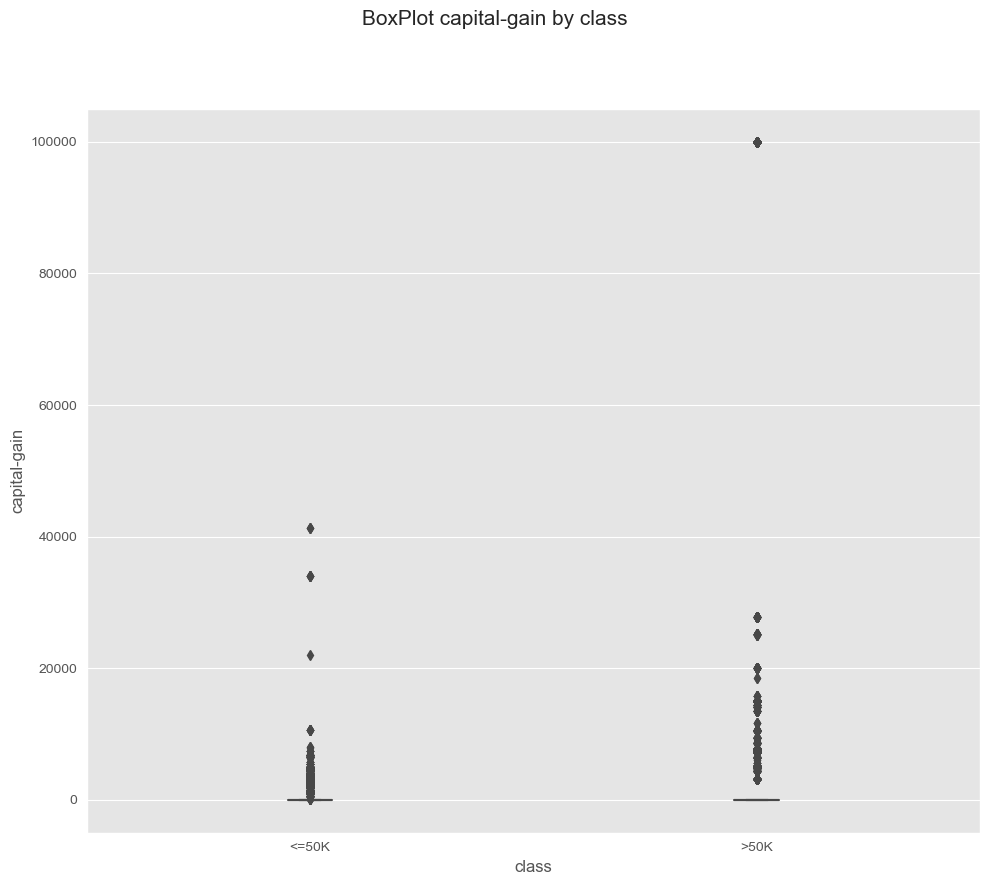

In [28]:
boxplot_grid(alldata, num_variable='capital-gain', cat_variable='class', width=0.1)

* Appeared very atypical values in both classes

### capital-loss by class

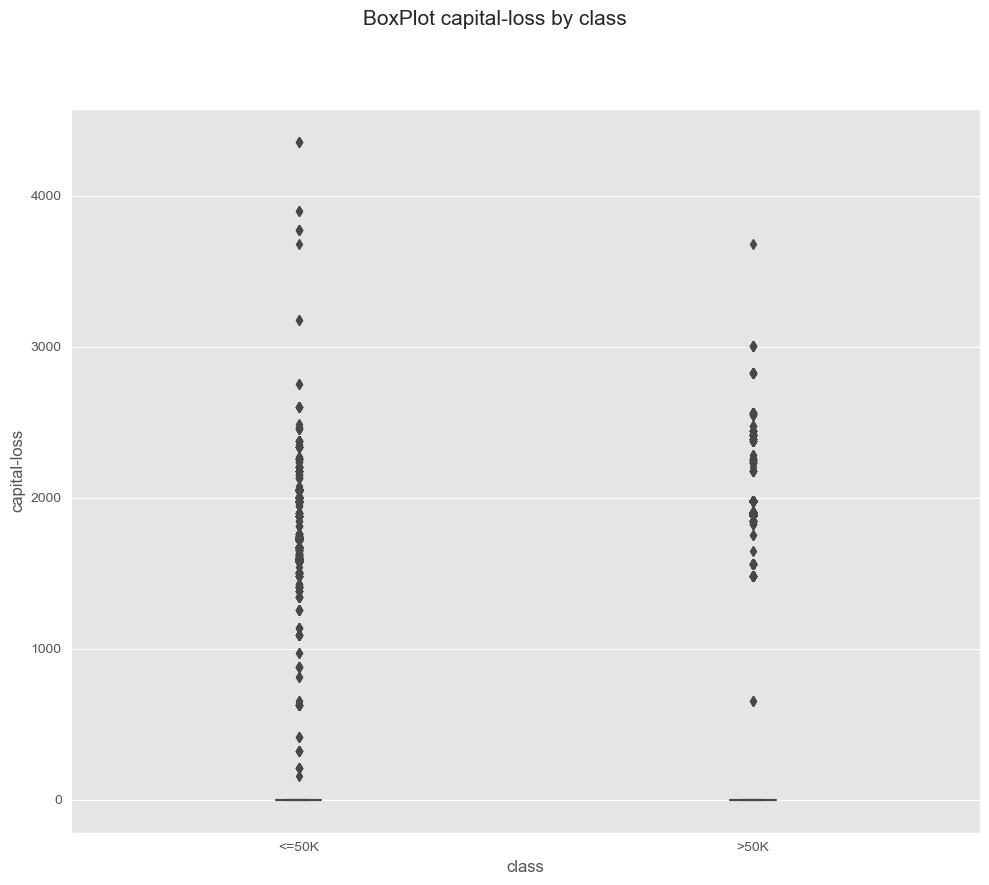

In [29]:
boxplot_grid(alldata, num_variable='capital-loss', cat_variable='class', width=0.1)

Very similar results with capital-gain


### Correlation plot

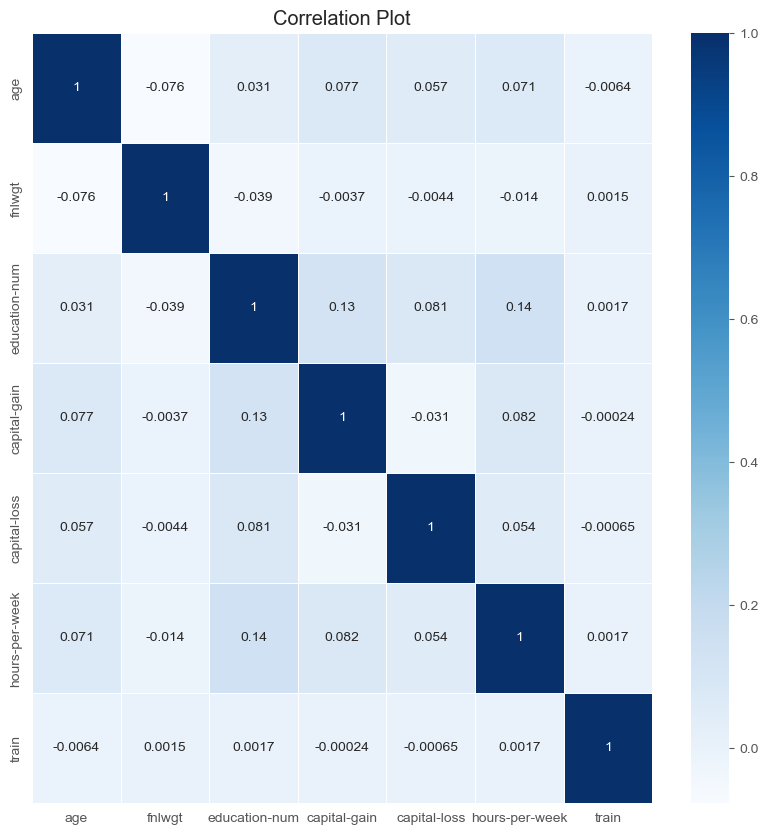

In [30]:
corr = alldata.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr,
            cmap = 'Blues',
            annot = True,
            linewidth=.5,
            ax = ax)

plt.title('Correlation Plot')
plt.savefig('img/correlation_plot.jpg')
plt.show()

### Age vs fnlwgt per class

In [31]:
#@title
def multivar_analysis(data, numvar_1, numvar_2, cat_var, fig_size=(8,6)):

    '''
    note: works only with cat_var has only two classes
    :param data: dataframe
    :param numvar_1: numeric value on the x axis
    :param numvar_2: numeric value on the y axis
    :param cat_var: categorical value to split data
    :param fig_size: figure size, default (8,6)
    :return: graph with un lineplot and 2 2dhistograms
    '''

    if len(data[cat_var].unique().tolist()) == 2:
        def annotate_axes(ax, text, fontsize=18):
            ax.text(0.5, 0.5, text, transform=ax.transAxes,
                    ha="center", va="center", fontsize=fontsize, color="darkgrey")
        ## Build the multigraph
        fig = plt.figure(figsize=fig_size, layout="constrained")
        spec = fig.add_gridspec(2, 2)
        ax0 = fig.add_subplot(spec[0, :])
        ax10 = fig.add_subplot(spec[1, 0])
        ax11 = fig.add_subplot(spec[1, 1])
        ## Uncomment if want to see the identifiers of the subplots
        #annotate_axes(ax0, 'ax0')
        #annotate_axes(ax10, 'ax10')
        #annotate_axes(ax11, 'ax11')

        fig.suptitle('Multivariate analysis')
        ## Assigning the plots
        sns.lineplot(data=data, x=numvar_1, y=numvar_2, hue=cat_var, estimator='mean', ax=ax0).set_title('Centra Tendency Lines', fontsize=10)
        sns.histplot(data=data[data[cat_var] == data[cat_var].unique()[0]], x=numvar_1, y=numvar_2, ax=ax10).set_title(f'{numvar_1} vs {numvar_2} in {data[cat_var].unique()[0]}', fontsize=10)
        ax10.axvline(data[data[cat_var] == data[cat_var].unique()[0]][numvar_1].mean(), c='k', ls='--')
        sns.histplot(data=data[data[cat_var] == data[cat_var].unique()[1]], x=numvar_1, y=numvar_2, ax=ax11).set_title(f'{numvar_1} vs {numvar_2} in {data[cat_var].unique()[1]}', fontsize=10)
        ax11.axvline(data[data[cat_var] == data[cat_var].unique()[1]][numvar_1].mean(), c='k', ls='--')
        plt.tight_layout()

        plt.savefig(f"img/{numvar_1}_vs_{numvar_2}_per_{cat_var}.jpg")

    else:
        print(f'The variable {cat_var} has more than 2 classes, you must not use this function to plot')

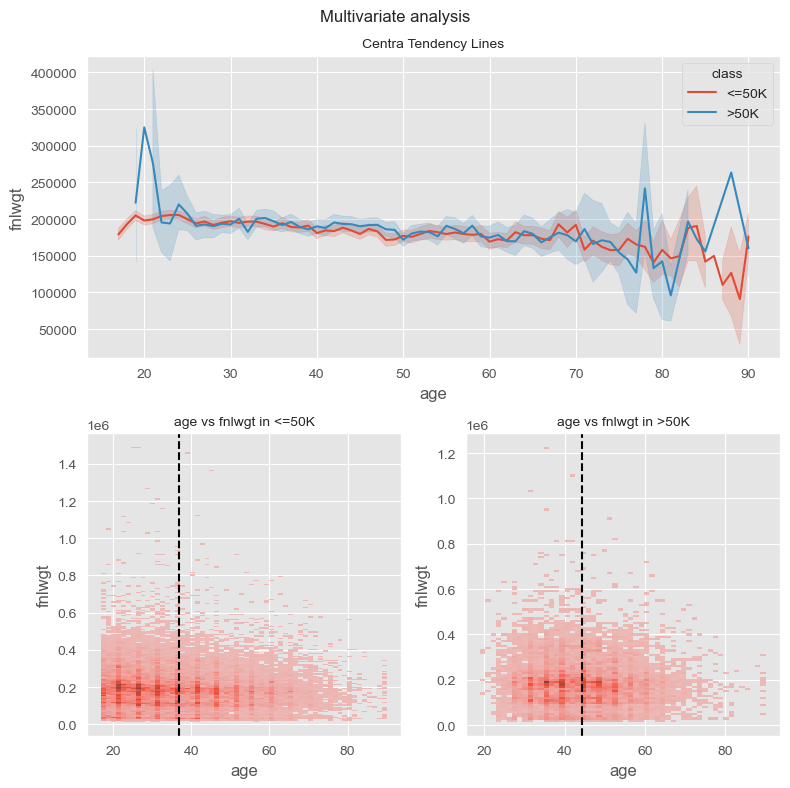

In [32]:
multivar_analysis(alldata, numvar_1='age', numvar_2='fnlwgt', cat_var='class', fig_size=(8,8))

* The line plot shows the aggregation over multiple `y` values at each value of `x` and shows an estimate of the central tendency (mean in this case) and a confidence interval for that estimate.
* Then, we see that in both classes the central tendency look similar except on extreme values
* The histogram shows a concentration in the botton left on both graphs


### Age vs education-num per class

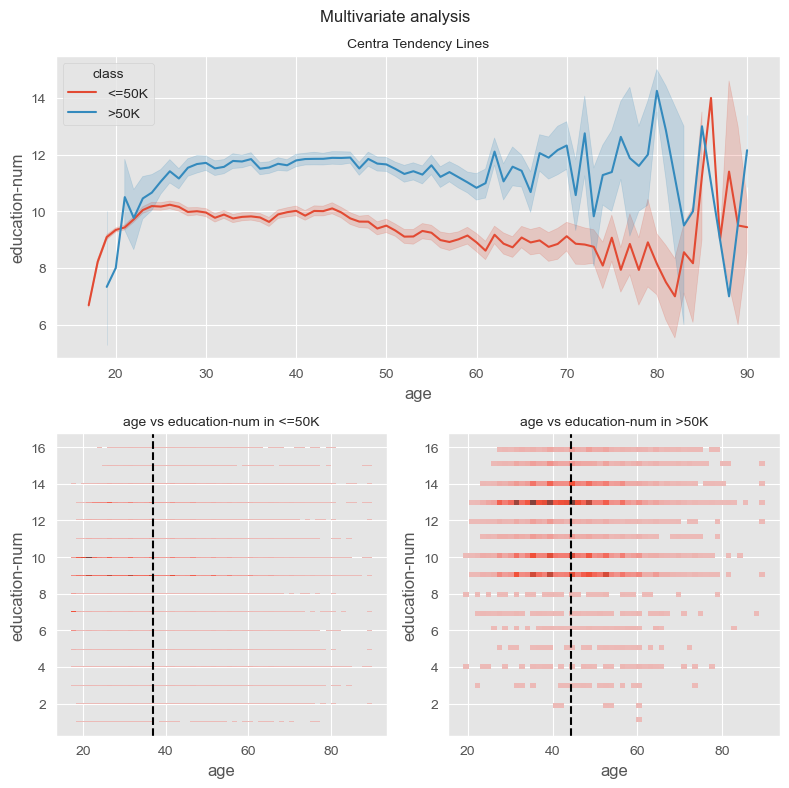

In [33]:
multivar_analysis(alldata, numvar_1='age', numvar_2='education-num', cat_var='class', fig_size=(8,8))


*  `>50K` has higher averages in `education-num` than `<=50K`

### Age vs Capital-gain per class

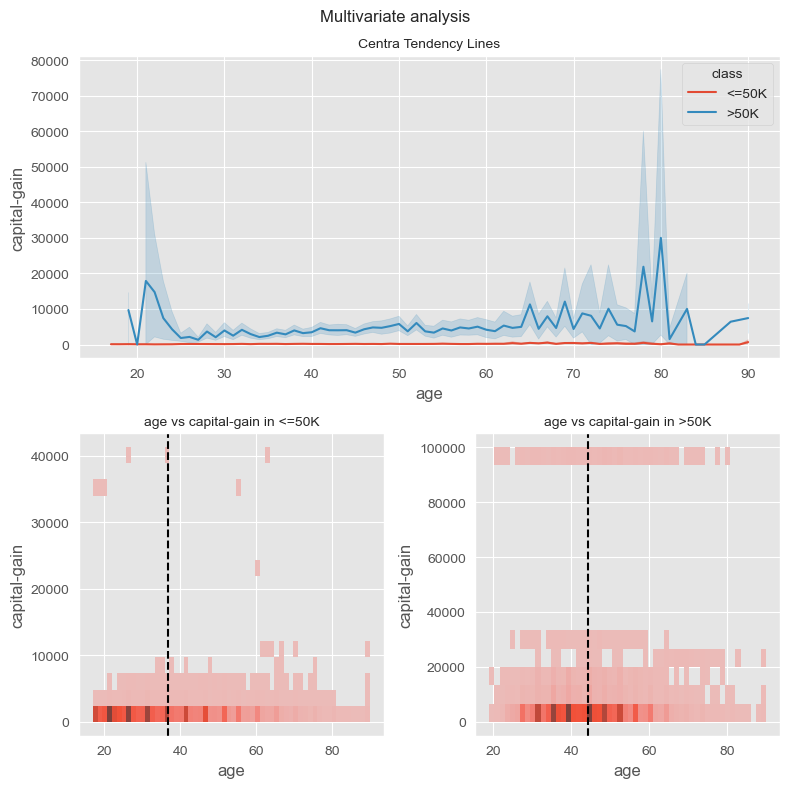

In [34]:
multivar_analysis(alldata, numvar_1='age', numvar_2='capital-gain', cat_var='class', fig_size=(8,8))

* In `<=50K` class `capital-gain` averages seems pretty low, near 0, on the contrary with `>50K` that has variability in the averages.

### age vs capital-loss per class

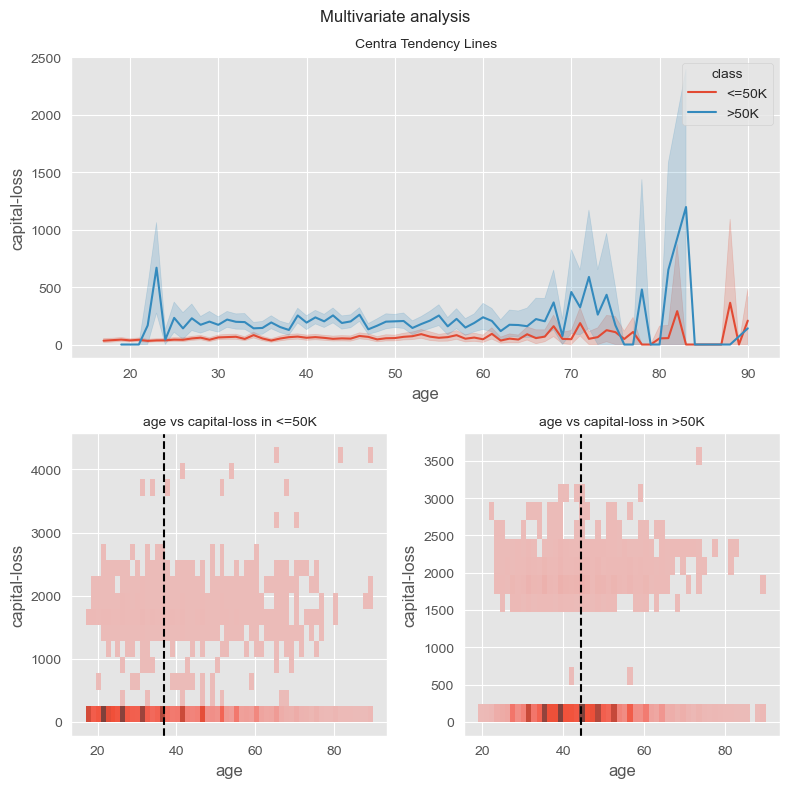

In [35]:
multivar_analysis(alldata, numvar_1='age', numvar_2='capital-loss', cat_var='class', fig_size=(8,8))

* `<=50K` class `capital-loos` averages still seems pretty low, but this time is not close 0, we find higher variablity in the older people,
*  `>50K` that has variability in the averages on all ages.

### Age vs hour-per-week per class

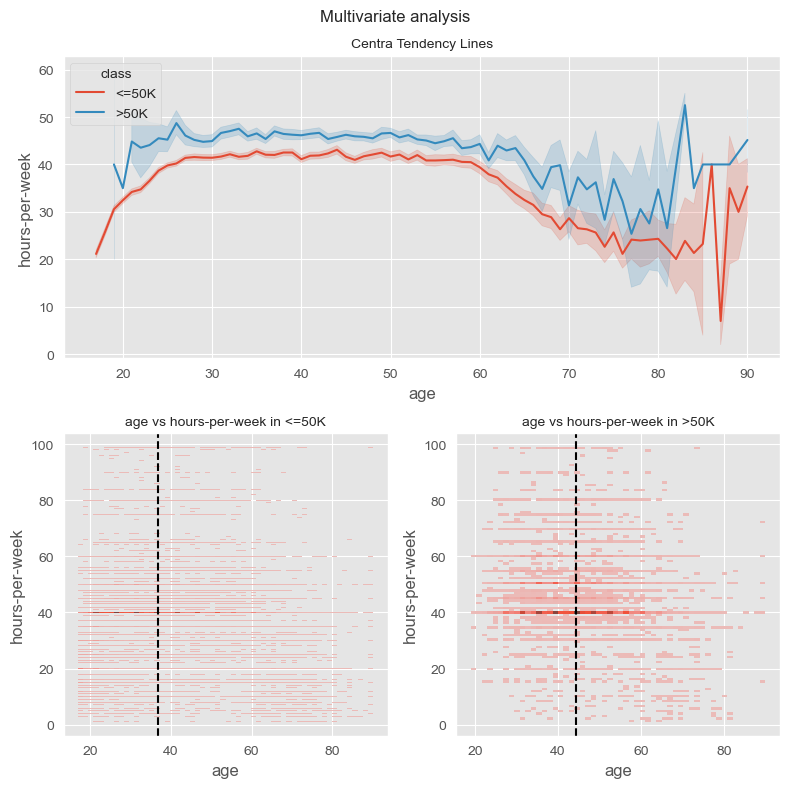

In [36]:
multivar_analysis(alldata, numvar_1='age', numvar_2='hours-per-week', cat_var='class', fig_size=(8,8))

* In avarege people of `>50K` works more thatn the people `<=50K` in every age.
* The histogram shows that also people despite there are people that works a few hours, and other works lots of hours, there are concentration between 40 and 50 hours for the people in the class `>50K`